**Importing Libraries and datasets**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
item = pd.read_csv('items.csv')
#item.head()

In [3]:
review = pd.read_csv('reviews.csv')
#review.head()

C:\Users\Haroon\AppData\Local\Temp\ipykernel_10144\2538011294.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  review = pd.read_csv('reviews.csv')


In [4]:
df = pd.merge(item, review, how='right', on='asin')
df.head()

,asin,brand,title_x,url,image,rating_x,reviewUrl,totalReviews,price,originalPrice,name,rating_y,date,verified,title_y,body,helpfulVotes
0,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14.0,0.0,0.0,Janet,3.0,"October 11, 2005",False,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...,1.0
1,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14.0,0.0,0.0,Luke Wyatt,1.0,"January 7, 2004",False,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...,17.0
2,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14.0,0.0,0.0,Brooke,5.0,"December 30, 2003",False,Love This Phone,"This is a great, reliable phone. I also purcha...",5.0
3,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14.0,0.0,0.0,amy m. teague,3.0,"March 18, 2004",False,"Love the Phone, BUT...!","I love the phone and all, because I really did...",1.0
4,B0000SX2UC,NaN,Dual-Band / Tri-Mode Sprint PCS Phone w/ Voice...,https://www.amazon.com/Dual-Band-Tri-Mode-Acti...,https://m.media-amazon.com/images/I/2143EBQ210...,3.0,https://www.amazon.com/product-reviews/B0000SX2UC,14.0,0.0,0.0,tristazbimmer,4.0,"August 28, 2005",False,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...,1.0


**Remove all unnecessary columns**

In [5]:
df = df[['asin', 'brand', 'rating_x', 'totalReviews', 'rating_y', 'title_y', 'body', 'helpfulVotes']]
#df.head()

**Find if have null value**

In [6]:
df.isnull().sum()

asin                7
brand             207
rating_x            7
totalReviews        7
rating_y            7
title_y            21
body               28
helpfulVotes    40771
dtype: int64

In [7]:
del df['helpfulVotes']

In [8]:
#df.isnull().sum()

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

asin            0
brand           0
rating_x        0
totalReviews    0
rating_y        0
title_y         0
body            0
dtype: int64

In [11]:
#len(df['asin'])

In [12]:
#df.head()

**Finding all companies within one column**

In [13]:
df['brand'].unique()

array(['Motorola', 'Nokia', 'Samsung', 'HUAWEI', 'Sony', 'Apple',
       'Google', 'ASUS', 'OnePlus', 'Xiaomi'], dtype=object)

In [14]:
#Motorola = df[df['brand'].str.contains('Motorola')]
#c = Motorola.get('rating_x').mean() 
#print(c)

**Average of Brands over-all Products Rating**

In [15]:
for x in df['brand'].unique():
    t = df[df['brand'].str.contains(x)]
    i = t.get('rating_x').mean()
    #tt = []
    #tt.append(i)
    print(x,':',i)

Motorola : 3.7190036068530206
Nokia : 3.359638146770375
Samsung : 3.7238840614212596
HUAWEI : 4.288988764044944
Sony : 3.7275743348982786
Apple : 3.826321928460342
Google : 3.76378763866878
ASUS : 3.79203187250996
OnePlus : 4.314409221902016
Xiaomi : 4.388256631149399


**Total Customer Reviews on Each Brand**

In [16]:
for x in df['brand'].unique():
    t2 = df[df['brand'].str.contains(x)]
    i2 = t2.get('totalReviews').sum()
    print(x,':',i2)

Motorola : 3148618.0
Nokia : 2782036.0
Samsung : 14046400.0
HUAWEI : 856116.0
Sony : 734071.0
Apple : 1448456.0
Google : 1007423.0
ASUS : 32066.0
OnePlus : 22910.0
Xiaomi : 1300122.0


**Total Mobile count**

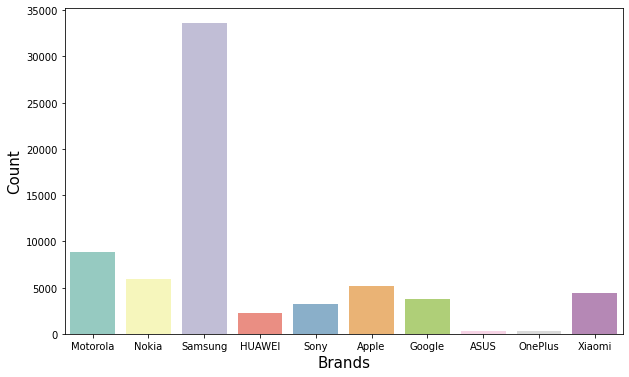

In [17]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'brand', data =df,palette = "Set3")
plt.xlabel('Brands',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()
#for p in ax.patches:
   #ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

**WordCloud**

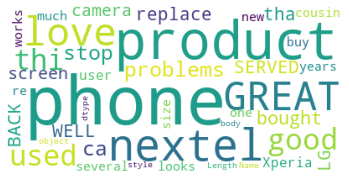

In [18]:
from wordcloud import WordCloud

mycloud = WordCloud(background_color="white",repeat=False,max_words=100).generate(str(df['body']))
plt.imshow(mycloud) 
plt.axis("off")
plt.show()

**title_y and body columns all word lower case and also remove puntuation**

In [19]:
df['body'] = df['body'].str.lower()
df['title_y'] = df['title_y'].str.lower()

In [20]:
import re
import string
import nltk

In [21]:
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [22]:
df['body'] = df['body'].apply(lambda x: remove_punctuation(x))
df['title_y'] = df['title_y'].apply(lambda x: remove_punctuation(x))

In [23]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body
18,B0009N5L7K,Motorola,3.0,7.0,5.0,excellent product,the product has been very good i had used this...
19,B0009N5L7K,Motorola,3.0,7.0,1.0,warning,my problems with nextel did not stop when i ca...
20,B0009N5L7K,Motorola,3.0,7.0,5.0,nextel boost phone,great product that is as great for nextel as i...
21,B000SKTZ0S,Motorola,2.7,22.0,4.0,nice but,i bought this phone to replace an lg phone tha...
24,B000SKTZ0S,Motorola,2.7,22.0,5.0,five stars,served me well as a back up phone


**Count Total Words of comments(body)**

In [24]:
df['total_words_body'] = df['body'].apply(lambda x:len(x.split()))
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,total_words_body
18,B0009N5L7K,Motorola,3.0,7.0,5.0,excellent product,the product has been very good i had used this...,32
19,B0009N5L7K,Motorola,3.0,7.0,1.0,warning,my problems with nextel did not stop when i ca...,474
20,B0009N5L7K,Motorola,3.0,7.0,5.0,nextel boost phone,great product that is as great for nextel as i...,17
21,B000SKTZ0S,Motorola,2.7,22.0,4.0,nice but,i bought this phone to replace an lg phone tha...,158
24,B000SKTZ0S,Motorola,2.7,22.0,5.0,five stars,served me well as a back up phone,8


In [25]:
#pd.set_option('display.max_colwidth', 500)

**Sentimental analyze**

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
sid = SentimentIntensityAnalyzer()

In [28]:
df['title_y'].iloc[0]

'excellent product'

In [50]:
X="smoki"

In [51]:
sid.polarity_scores(x)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [29]:
sid.polarity_scores(df['title_y'].iloc[0])

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [30]:
df['title_score'] = df['title_y'].apply(lambda x: sid.polarity_scores(x))

In [31]:
#df.head()

In [32]:
df['title_compound'] = df['title_score'].apply(lambda x: x['compound'])

In [33]:
#df.head()

In [34]:
df['title_com_review'] = df['title_compound'].apply(lambda x: 'pos' if x>= 0.00 else 'neg')

In [35]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,total_words_body,title_score,title_compound,title_com_review
18,B0009N5L7K,Motorola,3.0,7.0,5.0,excellent product,the product has been very good i had used this...,32,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.5719,pos
19,B0009N5L7K,Motorola,3.0,7.0,1.0,warning,my problems with nextel did not stop when i ca...,474,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3400,neg
20,B0009N5L7K,Motorola,3.0,7.0,5.0,nextel boost phone,great product that is as great for nextel as i...,17,"{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...",0.4019,pos
21,B000SKTZ0S,Motorola,2.7,22.0,4.0,nice but,i bought this phone to replace an lg phone tha...,158,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.2263,pos
24,B000SKTZ0S,Motorola,2.7,22.0,5.0,five stars,served me well as a back up phone,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [36]:
df['title_com_review'].value_counts()

pos    58792
neg     8957
Name: title_com_review, dtype: int64

In [37]:
df['body_score'] = df['body'].apply(lambda x: sid.polarity_scores(x))

In [38]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,total_words_body,title_score,title_compound,title_com_review,body_score
18,B0009N5L7K,Motorola,3.0,7.0,5.0,excellent product,the product has been very good i had used this...,32,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.5719,pos,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp..."
19,B0009N5L7K,Motorola,3.0,7.0,1.0,warning,my problems with nextel did not stop when i ca...,474,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3400,neg,"{'neg': 0.06, 'neu': 0.876, 'pos': 0.064, 'com..."
20,B0009N5L7K,Motorola,3.0,7.0,5.0,nextel boost phone,great product that is as great for nextel as i...,17,"{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...",0.4019,pos,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp..."
21,B000SKTZ0S,Motorola,2.7,22.0,4.0,nice but,i bought this phone to replace an lg phone tha...,158,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.2263,pos,"{'neg': 0.058, 'neu': 0.808, 'pos': 0.134, 'co..."
24,B000SKTZ0S,Motorola,2.7,22.0,5.0,five stars,served me well as a back up phone,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp..."


In [39]:
df['body_compound'] = df['body_score'].apply(lambda x: x['compound'])

In [40]:
df['body_com_review'] = df['body_compound'].apply(lambda x: 'pos' if x>= 0.00 else 'neg')

In [41]:
df.head()

,asin,brand,rating_x,totalReviews,rating_y,title_y,body,total_words_body,title_score,title_compound,title_com_review,body_score,body_compound,body_com_review
18,B0009N5L7K,Motorola,3.0,7.0,5.0,excellent product,the product has been very good i had used this...,32,"{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'comp...",0.5719,pos,"{'neg': 0.0, 'neu': 0.701, 'pos': 0.299, 'comp...",0.8777,pos
19,B0009N5L7K,Motorola,3.0,7.0,1.0,warning,my problems with nextel did not stop when i ca...,474,"{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...",-0.3400,neg,"{'neg': 0.06, 'neu': 0.876, 'pos': 0.064, 'com...",-0.7075,neg
20,B0009N5L7K,Motorola,3.0,7.0,5.0,nextel boost phone,great product that is as great for nextel as i...,17,"{'neg': 0.0, 'neu': 0.426, 'pos': 0.574, 'comp...",0.4019,pos,"{'neg': 0.0, 'neu': 0.562, 'pos': 0.438, 'comp...",0.8979,pos
21,B000SKTZ0S,Motorola,2.7,22.0,4.0,nice but,i bought this phone to replace an lg phone tha...,158,"{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'comp...",0.2263,pos,"{'neg': 0.058, 'neu': 0.808, 'pos': 0.134, 'co...",0.9389,pos
24,B000SKTZ0S,Motorola,2.7,22.0,5.0,five stars,served me well as a back up phone,8,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,"{'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'comp...",0.2732,pos


Text(0.5, 1.0, 'Title sentiment analysis')

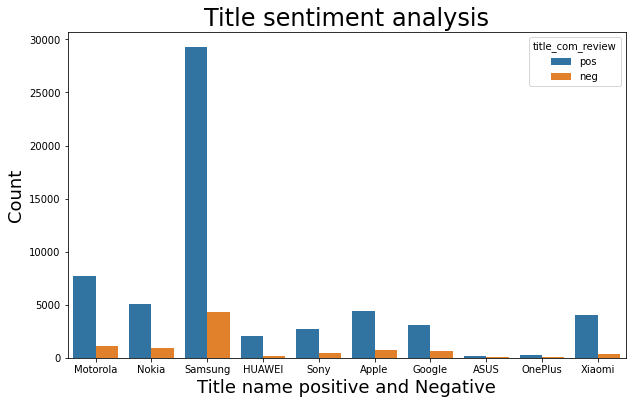

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'brand', hue = 'title_com_review', data = df)
plt.xlabel('Title name positive and Negative', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Title sentiment analysis', fontsize = 24)

Text(0.5, 1.0, 'Comments sentiment analysis')

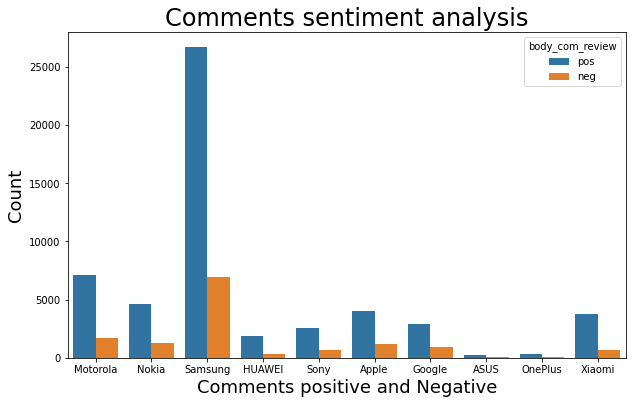

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'brand', hue = 'body_com_review', data = df)
plt.xlabel('Comments positive and Negative', fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.title('Comments sentiment analysis', fontsize = 24)

Text(0, 0.5, 'Total Count')

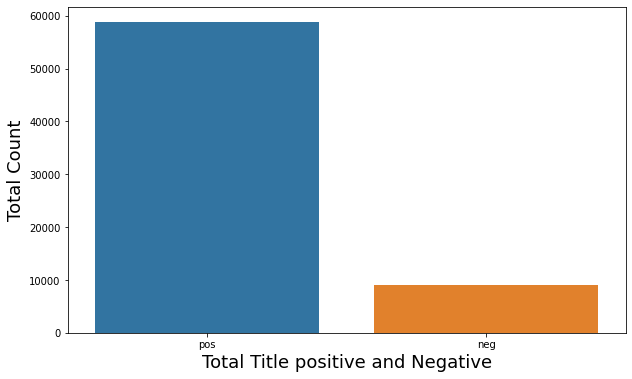

In [44]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'title_com_review', data = df)
plt.xlabel('Total Title positive and Negative', fontsize = 18)
plt.ylabel('Total Count', fontsize = 18)

Text(0.5, 0, 'Total comments positive and Neg')

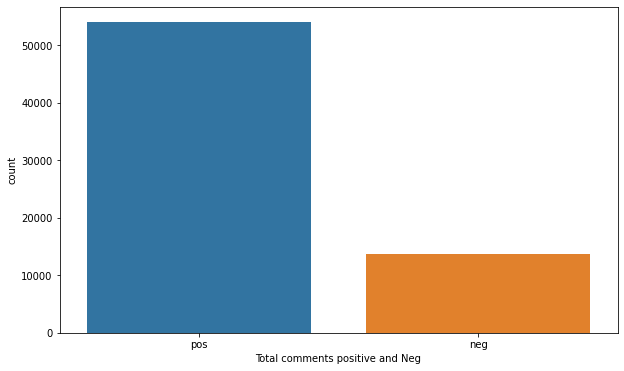

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'body_com_review', data = df)
plt.xlabel('Total comments positive and Neg')

In [46]:
df['body_com_review'].value_counts()

pos    53991
neg    13758
Name: body_com_review, dtype: int64

In [47]:
#df.head()

Text(0.5, 1.0, 'Comments sentiment analysis vs rating_y')

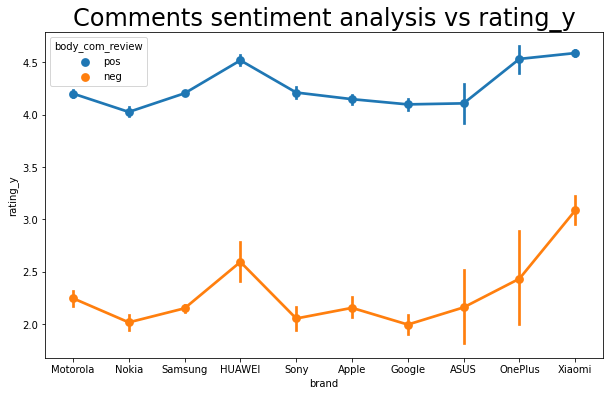

In [48]:
plt.figure(figsize=(10,6))
sns.pointplot(x = 'brand', y = 'rating_y', hue = 'body_com_review', data = df)
plt.title('Comments sentiment analysis vs rating_y', fontsize = 24)

Text(0.5, 1.0, 'Comments sentiment analysis vs rating_y')

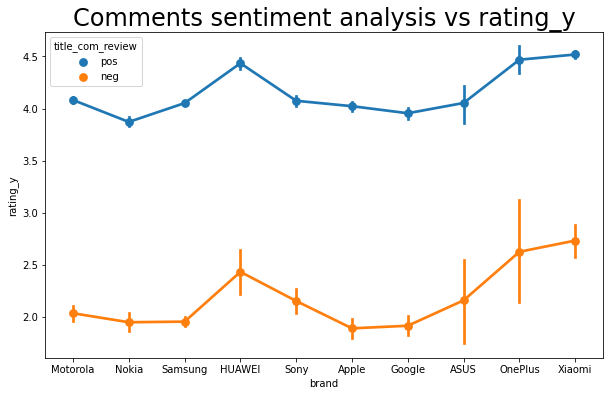

In [49]:
plt.figure(figsize=(10,6))
sns.pointplot(x = 'brand', y = 'rating_y', hue = 'title_com_review', data = df)
plt.title('Comments sentiment analysis vs rating_y', fontsize = 24)